<a href="https://colab.research.google.com/github/slapazromero/EjercicioNB_Heart/blob/main/Ejercicios_NaiveBayes_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
heart = pd.read_csv('heart.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Modificaciones de los datos.

In [5]:
le = preprocessing.LabelEncoder()
heart['Sex'] = le.fit_transform(heart.Sex.values)
heart['ChestPainType'] = le.fit_transform(heart.ChestPainType.values)
heart['RestingECG'] = le.fit_transform(heart.RestingECG.values)
heart['ExerciseAngina'] = le.fit_transform(heart.ExerciseAngina.values)
heart['ST_Slope'] = le.fit_transform(heart.ST_Slope.values)

In [6]:
copy = heart['Oldpeak'].copy()
for i in range(len(copy)):
  if copy[i] < 0:
    copy[i] *= -1
heart['Oldpeak'] = copy

In [ ]:
copy = heart['Oldpeak'].copy()
for i in range(len(copy)):
  if copy[i] < 0:
    copy[i] = copy.mean()
heart['Oldpeak'] = copy

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [7]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [8]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [9]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.915251,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.042712,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

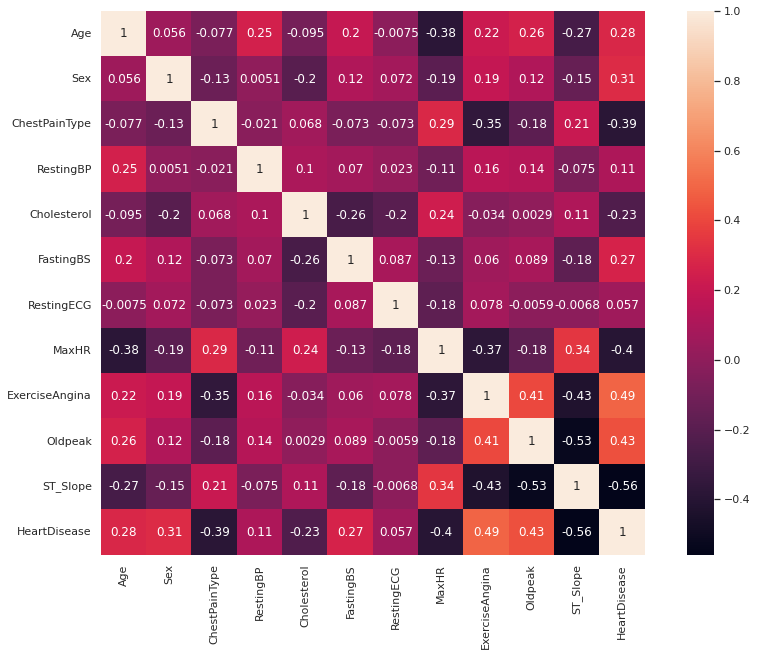

In [10]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(heart.corr(), square=True, annot=True)


## Seleccionar las características a tener en cuenta en el estudio.

Comenzaremos haciendo un analisis con todos los datos.

## Separar datos entre datos de entrada y etiquetas (resultados).

In [11]:
x_heart = heart.drop('HeartDisease', axis=1)
y_heart = heart['HeartDisease']

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_heart, y_heart, test_size=0.25)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [13]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Realizar una predicción con los datos de prueba.

In [14]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [15]:
accuracy_score(y_test, y_predict)

0.8347826086956521

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [16]:
y_predict

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

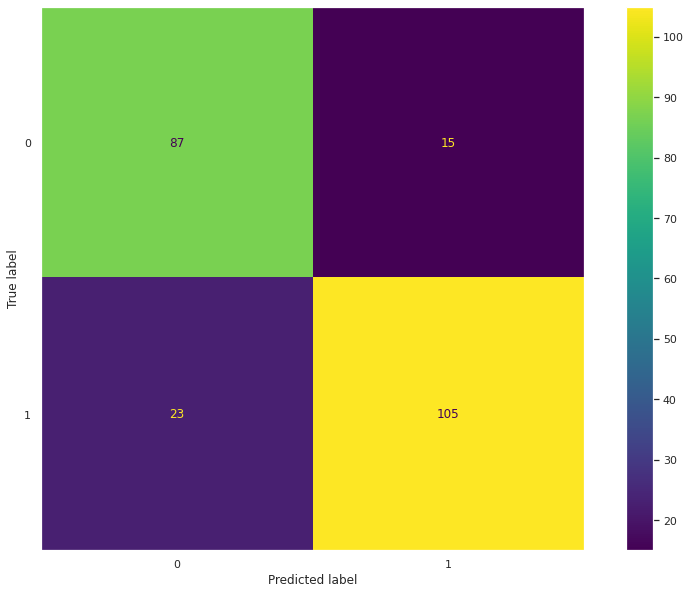

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Seleccionar las características a tener en cuenta en el estudio. (Alta correlación)

In [18]:
caracteristicas = ['ST_Slope', 'ExerciseAngina', 'Oldpeak', 'MaxHR']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [19]:
x_wine = heart[caracteristicas]
y_wine = heart['HeartDisease']

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [21]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Realizar una predicción con los datos de prueba.

In [22]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [23]:
accuracy_score(y_test, y_predict)

0.7913043478260869

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [24]:
y_predict

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

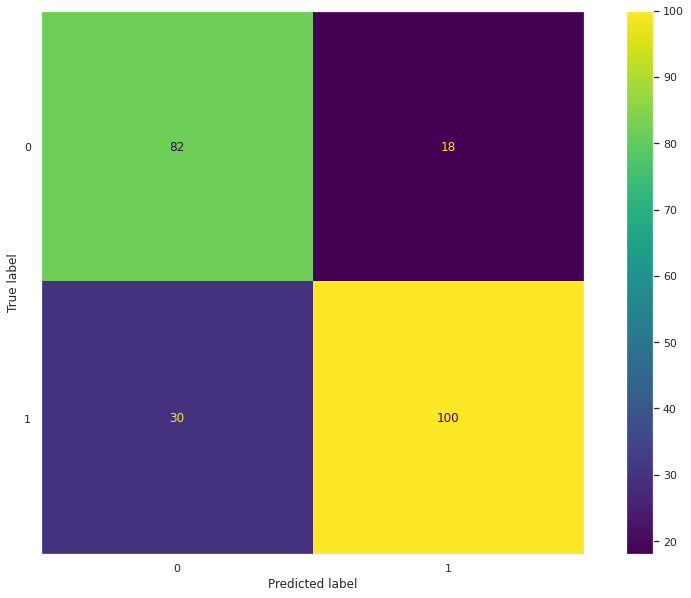

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Seleccionar las características a tener en cuenta en el estudio. (Baja correlación)

In [26]:
caracteristicas = ['RestingBP', 'RestingECG', 'FastingBS', 'Age']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [27]:
x_wine = heart[caracteristicas]
y_wine = heart['HeartDisease']

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [29]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Realizar una predicción con los datos de prueba.

In [30]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [31]:
accuracy_score(y_test, y_predict)

0.6

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [32]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

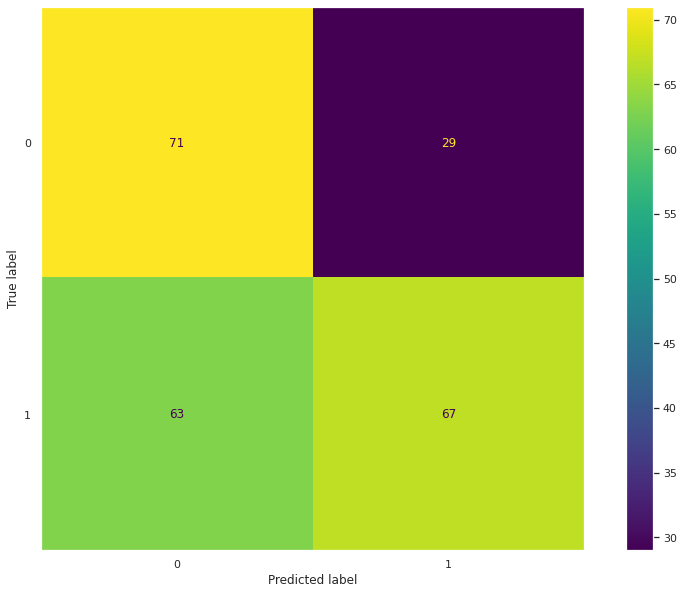

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Optimización (probar el proceso con distintos clasificadores).

## Finalmente prueba los distintos clasificadores y realiza una pequeña comparativa indicando cuál obtiene mejores resultados.

## Seleccionar las características a tener en cuenta en el estudio.

In [34]:
caracteristicas = ['ST_Slope', 'ExerciseAngina', 'Sex', 'MaxHR']
resultado = ['HeartDisease']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [35]:
x_wine = heart[caracteristicas]
y_wine = heart[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# GaussianNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [37]:
model = GaussianNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## Realizar una predicción con los datos de prueba.

In [38]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [39]:
accuracy_score(y_test, y_predict)

0.7913043478260869

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [40]:
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

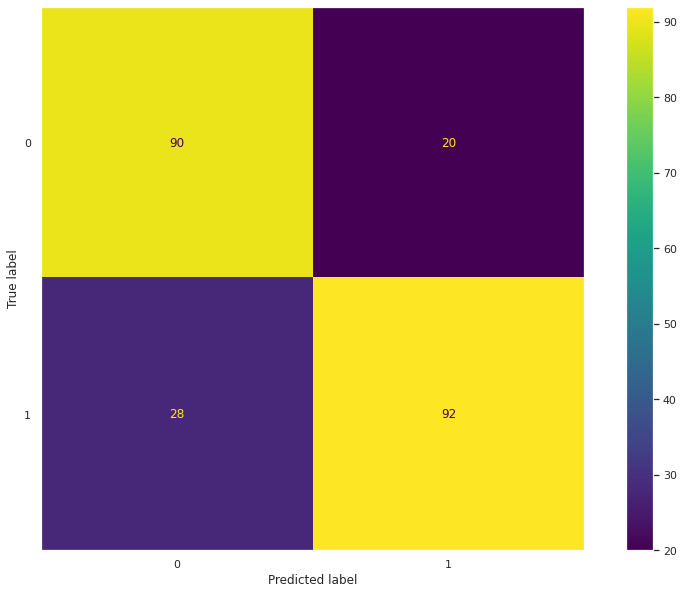

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# MultinomialNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [42]:
model = MultinomialNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

## Realizar una predicción con los datos de prueba.

In [43]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [44]:
accuracy_score(y_test, y_predict)

0.7652173913043478

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [45]:
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

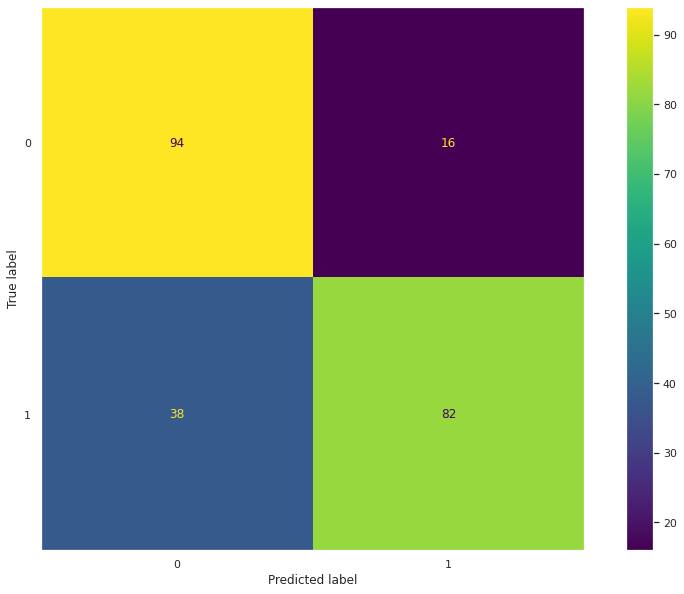

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# ComplementNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [47]:
model = ComplementNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB()

## Realizar una predicción con los datos de prueba.

In [48]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [49]:
accuracy_score(y_test, y_predict)

0.7260869565217392

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [50]:
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

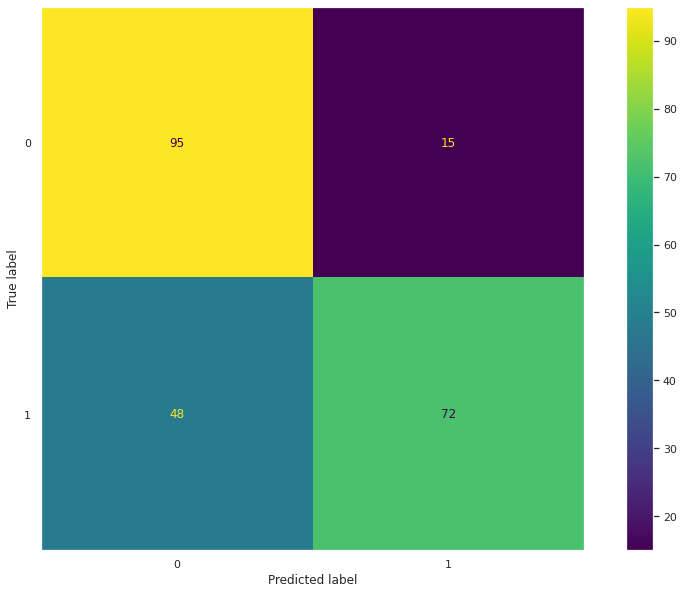

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# BernoulliNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [52]:
model = BernoulliNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

## Realizar una predicción con los datos de prueba.

In [53]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [54]:
accuracy_score(y_test, y_predict)

0.7260869565217392

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [55]:
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

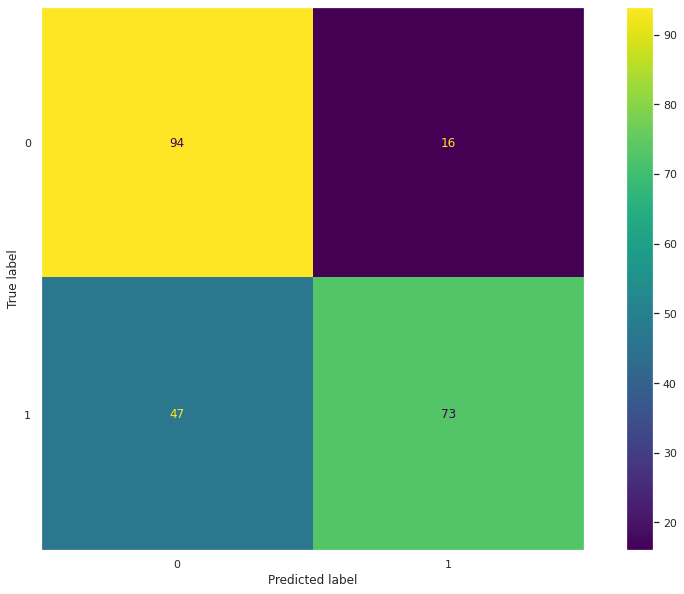

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# CategoricalNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [57]:
model = CategoricalNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

## Realizar una predicción con los datos de prueba.

In [58]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [59]:
accuracy_score(y_test, y_predict)

0.8173913043478261

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [60]:
y_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

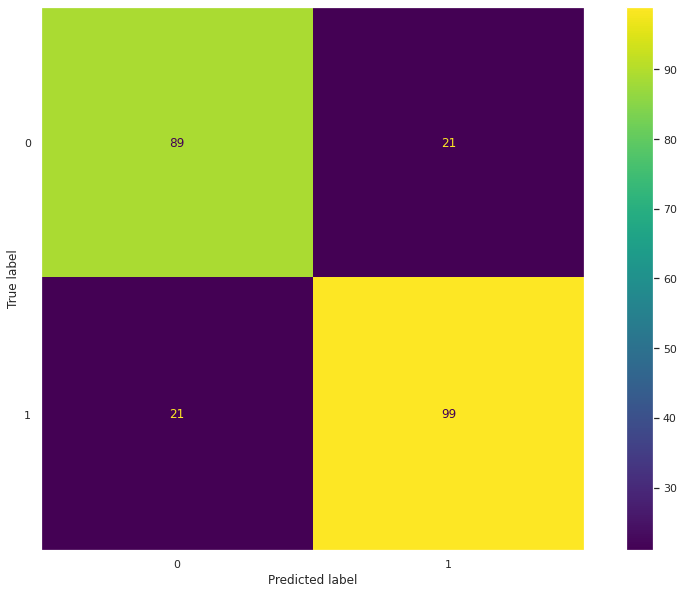

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

## Seleccionar las características a tener en cuenta en el estudio.

In [70]:
caracteristicas = ['Sex', 'FastingBS', 'ExerciseAngina']
resultado = ['HeartDisease']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [71]:
x_wine = heart[caracteristicas]
y_wine = heart[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# BernoulliNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [73]:
model = BernoulliNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

## Realizar una predicción con los datos de prueba.

In [74]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [75]:
accuracy_score(y_test, y_predict)

0.782608695652174

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [76]:
y_predict

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

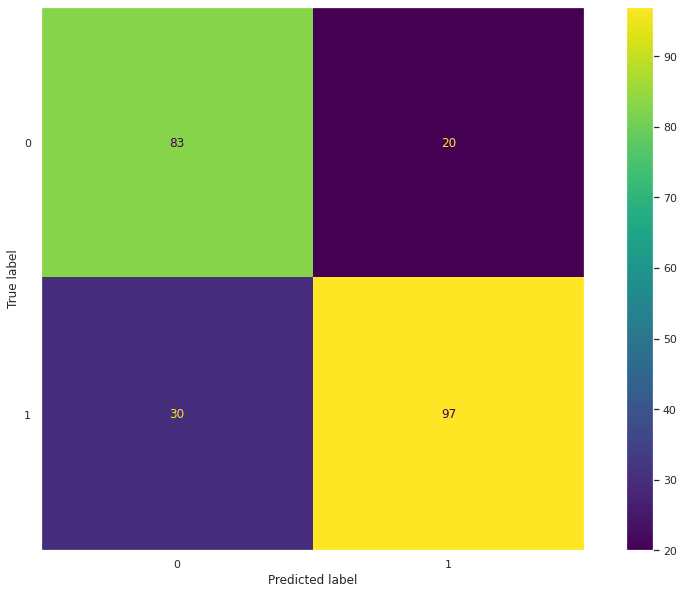

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)